### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,5)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.api as smg

### Loading Data

In [2]:
co2 = pd.read_csv('co2.csv')
tmpr = pd.read_csv('temperature.csv')

Loaded 2 dataset from “datahub.io”:
1. Global CO2 Emissions from Fossil Fuels since 1751 
2. Global Temperature Time Series

---

### Global CO2 Emissions
Global CO2 Emissions from fossil-fuels annually since 1751 till 2014.

> source: https://datahub.io/core/co2-fossil-global

### Global Temperature Time Series
Global Temperature Time Series. Data are included from the GISS Surface Temperature (GISTEMP) analysis and the global component of Climate at a Glance (GCAG). Two datasets are provided: 1) global monthly mean and 2) annual mean temperature anomalies in degrees Celsius from 1880 to the present.
> source: https://datahub.io/core/global-temp

In [3]:
co2.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [4]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   61 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB


In [5]:
co2.describe()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
count,260.000000,260.000000,260.00000,260.000000,260.000000,260.000000,260.000000,61.000000
mean,1880.500000,1402.788462,185.20000,495.819231,674.569231,34.161538,13.065385,1.054754
std,75.199734,2253.098527,396.58556,934.308074,868.368580,78.899604,26.311315,0.178630
min,1751.000000,3.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.640000
25%,1815.750000,12.750000,0.00000,0.000000,12.750000,0.000000,0.000000,0.940000
50%,1880.500000,239.500000,0.00000,3.000000,236.000000,0.000000,0.000000,1.120000
75%,1945.250000,1385.000000,59.50000,279.250000,1023.500000,12.000000,0.000000,1.170000
max,2010.000000,9167.000000,1702.00000,3122.000000,3842.000000,450.000000,110.000000,1.330000


In [6]:
tmpr.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


In [7]:
tmpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  274 non-null    object 
 1   Year    274 non-null    int64  
 2   Mean    274 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [8]:
tmpr.describe()

,Year,Mean
count,274.000000,274.000000
mean,1948.000000,0.036588
std,39.619805,0.320069
min,1880.000000,-0.470000
25%,1914.000000,-0.204350
50%,1948.000000,-0.053400
75%,1982.000000,0.229025
max,2016.000000,0.990000


#  Data Cleansing


We have to filter ‘Global CO2 Emissions’  for years after 1880 because ‘Global Temperature’ data is after 1880.

In [9]:
# Filtering dataset to match other dataset
co2 = co2[co2['Year'] >= 1880]
co2

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
129,1880,236,0,3,233,0,0,NaN
130,1881,243,0,4,239,0,0,NaN
131,1882,256,0,4,252,0,0,NaN
132,1883,272,0,3,269,0,0,NaN
133,1884,275,0,4,271,0,0,NaN
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


We have to filter ‘Global Temperature’ for years before 2010 because ‘Global CO2 Emissions’ data is until 2010.

In [10]:
# Filtering dataset to match other dataset
tmpr = tmpr[tmpr['Year'] <= 2010]
tmpr

,Source,Year,Mean
12,GCAG,2010,0.7014
13,GISTEMP,2010,0.7100
14,GCAG,2009,0.6367
15,GISTEMP,2009,0.6400
16,GCAG,2008,0.5419
...,...,...,...
269,GISTEMP,1882,-0.1000
270,GCAG,1881,-0.0628
271,GISTEMP,1881,-0.1200
272,GCAG,1880,-0.1148


For ‘Global CO2 Emissions’ keep only ‘Total’ column and drop others, set the index to ‘Year’ Column and sort data by index(Year).

In [11]:
co2 = co2.drop(['Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring', 'Per Capita'], axis=1).set_index('Year').sort_index()

---
For ‘Global CO2 Emissions’ dataset, separating two sources (GCAG, GISTEMP), then drop the source and set the index on ‘Year’ column and sort data by index (Year)

In [12]:
GCAG = tmpr[(tmpr['Source'] == 'GCAG')].set_index('Year').drop(['Source'], axis=1).sort_index()

In [13]:
GISTEMP = tmpr[(tmpr['Source'] == 'GISTEMP')].set_index('Year').drop(['Source'], axis=1).sort_index()

# Insights

Set a color for each data set and plot data to visually check our datasets.

- <p style="color:#5F9EA0">‘Global CO2 Emissions’ = ‘#5F9EA0’
- <p style="color:#A52A2A">‘Global Temperature GCAG’ = ‘#A52A2A’
- <p style="color:#8A2BE2">‘Global Temperature GIS_c’ = ‘#8A2BE2’

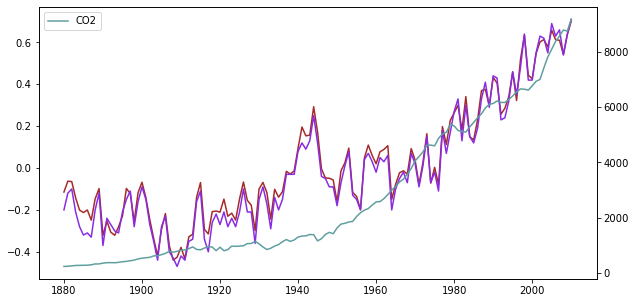

In [14]:
#set a color
co2_c = '#5F9EA0' #Cadet blue
GCAG_c = '#A52A2A' #Brown
GIS_c = '#8A2BE2' #Blue violet
fig, ax1 = plt.subplots()
# Add CO2 dataset on second axis
ax2 = ax1.twinx()
ax1.plot(GCAG, color= GCAG_c, label='GCAG')
ax1.plot(GISTEMP, color = GIS_c, label='GISTEMP')
ax2.plot(co2, color = co2_c, label='CO2')
plt.legend()
plt.show()

There are some differences between GCAG, and GISTEMP data, comparing two datasets’s histogram.

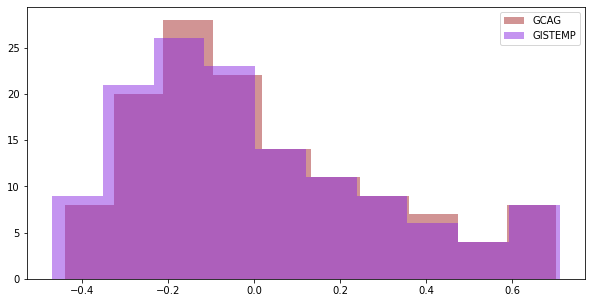

In [15]:
ax1 = plt.hist(GCAG, 10, alpha = 0.5, color = GCAG_c, label='GCAG')
ax2 = plt.hist(GISTEMP, 10, alpha = 0.5, color = GIS_c, label='GISTEMP')
plt.legend()
plt.show()

Plot a scatter plot for each dataset (GCAG, GISTEMP) with CO2.

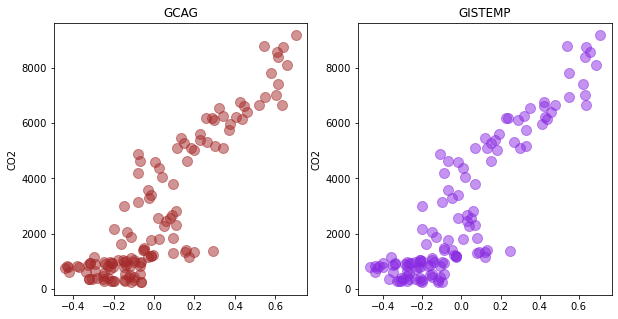

In [16]:
plt.subplot(1,2,1)
plt.scatter(GCAG, co2, alpha=0.5, s = 100, color = GCAG_c)
plt.title('GCAG')
plt.ylabel('CO2')
plt.subplot(1,2,2)
plt.scatter(GISTEMP, co2, alpha=0.5, s = 100, color = GIS_c)
plt.ylabel('CO2')
plt.title('GISTEMP')
plt.show()

Visually we can see a correlation between our datasets, but know we check the numbers

In [17]:
GCAG_corr = pd.concat([GCAG, co2], axis=1).corr()
GCAG_corr

,Mean,Total
Mean,1.000000,0.888284
Total,0.888284,1.000000


In [18]:
GISTEMP_corr = pd.concat([GISTEMP, co2], axis=1).corr()
GISTEMP_corr

,Mean,Total
Mean,1.000000,0.897529
Total,0.897529,1.000000


We can the there is a strong relationship between ‘Global CO2 Emissions’ &  ‘Global Temperature’.
- GCAG = 0.888284
- GISTEMP = 0.897529

### Linear Regression Models

In [19]:
GCAG_model = sm.OLS(GCAG, co2).fit()
GCAG_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.412   
Dependent Variable:     Mean             AIC:                         -30.0077
Date:                   2021-02-11 16:06 BIC:                         -27.1325
No. Observations:       131              Log-Likelihood:              16.004  
Df Model:               1                F-statistic:                 92.76   
Df Residuals:           130              Prob (F-statistic):          6.70e-17
R-squared (uncentered): 0.416            Scale:                       0.046211
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Total          0.0000        0.0000      9.6314      0.0000      0.0000      0.0001
------------------------------------------------------------------------------
Omnibus:                   3.886            Durbin-Watson:               0.226
Prob(Omnibus):             0.143            Jarque-Bera (JB):            3.604
Skew:                      0.337            Prob(JB):                    0.165
Kurtosis:                  2.546            Condition No.:               1    
==============================================================================

"""

In [20]:
GISTEMP_model = sm.OLS(GISTEMP, co2).fit()
GISTEMP_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.338   
Dependent Variable:     Mean             AIC:                         -3.7803 
Date:                   2021-02-11 16:06 BIC:                         -0.9051 
No. Observations:       131              Log-Likelihood:              2.8901  
Df Model:               1                F-statistic:                 67.87   
Df Residuals:           130              Prob (F-statistic):          1.63e-13
R-squared (uncentered): 0.343            Scale:                       0.056453
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Total          0.0000        0.0000      8.2383      0.0000      0.0000      0.0001
------------------------------------------------------------------------------
Omnibus:                   6.004            Durbin-Watson:               0.210
Prob(Omnibus):             0.050            Jarque-Bera (JB):            6.112
Skew:                      0.500            Prob(JB):                    0.047
Kurtosis:                  2.655            Condition No.:               1    
==============================================================================

"""

Text(0.5, 1.0, 'Linear Regression')

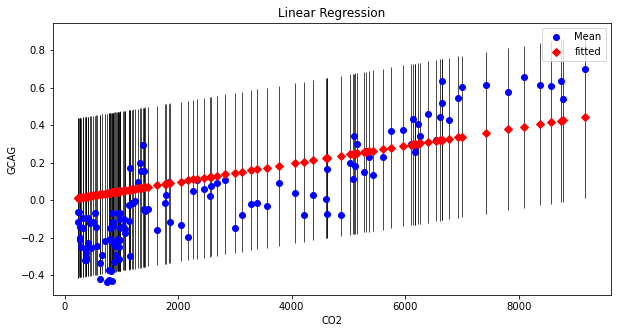

In [21]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(GCAG_model, 0, ax=ax)
ax.set_ylabel("GCAG")
ax.set_xlabel("CO2")
ax.set_title("Linear Regression")

Text(0.5, 1.0, 'Linear Regression')

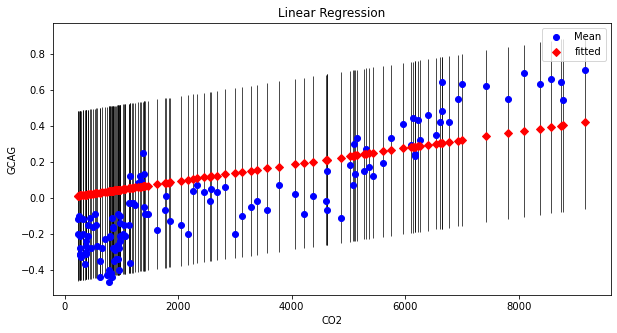

In [22]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(GISTEMP_model, 0, ax=ax)
ax.set_ylabel("GCAG")
ax.set_xlabel("CO2")
ax.set_title("Linear Regression")

### Using Seaborn 'regplot'

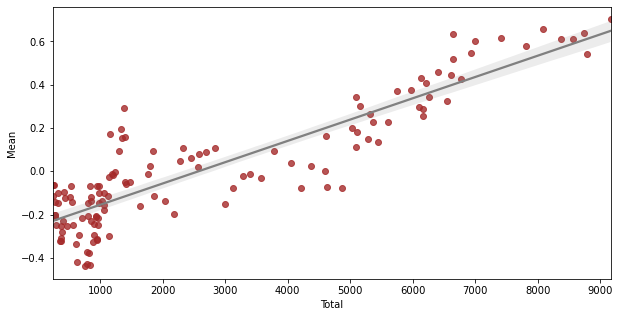

In [23]:
sns.regplot(x="Total", y="Mean", data=pd.concat([GCAG, co2], axis=1), scatter_kws={"color": "brown"}, line_kws={"color": "gray"});

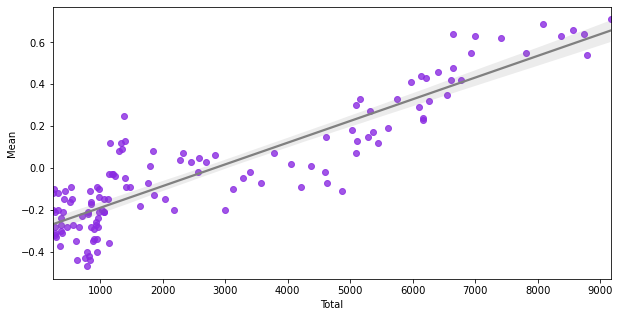

In [24]:
sns.regplot(x="Total", y="Mean", data=pd.concat([GISTEMP, co2], axis=1), scatter_kws={"color": "blueviolet"}, line_kws={"color": "gray"}, label = 'GISTEMP');

# Predict 2011-2021

In [25]:
pyear = np.arange(2011, 2021)
pd.DataFrame({'Year': pyear, 'GCAG': GCAG_model.predict(pyear), 'GISTEMP': GISTEMP_model.predict(pyear)})

,Year,GCAG,GISTEMP
0,2011,0.097440,0.092121
1,2012,0.097488,0.092166
2,2013,0.097536,0.092212
3,2014,0.097585,0.092258
4,2015,0.097633,0.092304
5,2016,0.097682,0.092350
6,2017,0.097730,0.092395
7,2018,0.097779,0.092441
8,2019,0.097827,0.092487
9,2020,0.097876,0.092533
